# End-to-end project

## Setup





In [184]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Get the data

### Download the data

Fetch the data

In [185]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

Now when you call fetch_housing_data(), it creates a datasets/housing directory in
your workspace, downloads the housing.tgz 1le, and extracts the housing.csv from it
in this directory.

In [186]:
fetch_housing_data()

Load the data using Pandas:

In [187]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Take a Quick Look at the Data Structure

Let’s take a look at the top five rows using the DataFrame’s head() method.

In [188]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The info() method is useful to get a quick description of the data:

In [189]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


You can find out what categories exist and how many districts belong to each
category by using the value_counts() method. E.g.:

In [190]:
housing["ocean_proximity"].value_counts()
#housing["latitude"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The describe() method shows a summary of the numerical attributes:

In [191]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of data you are dealing with is to plot a
histogram for each numerical attribute:

Saving figure attribute_histogram_plots


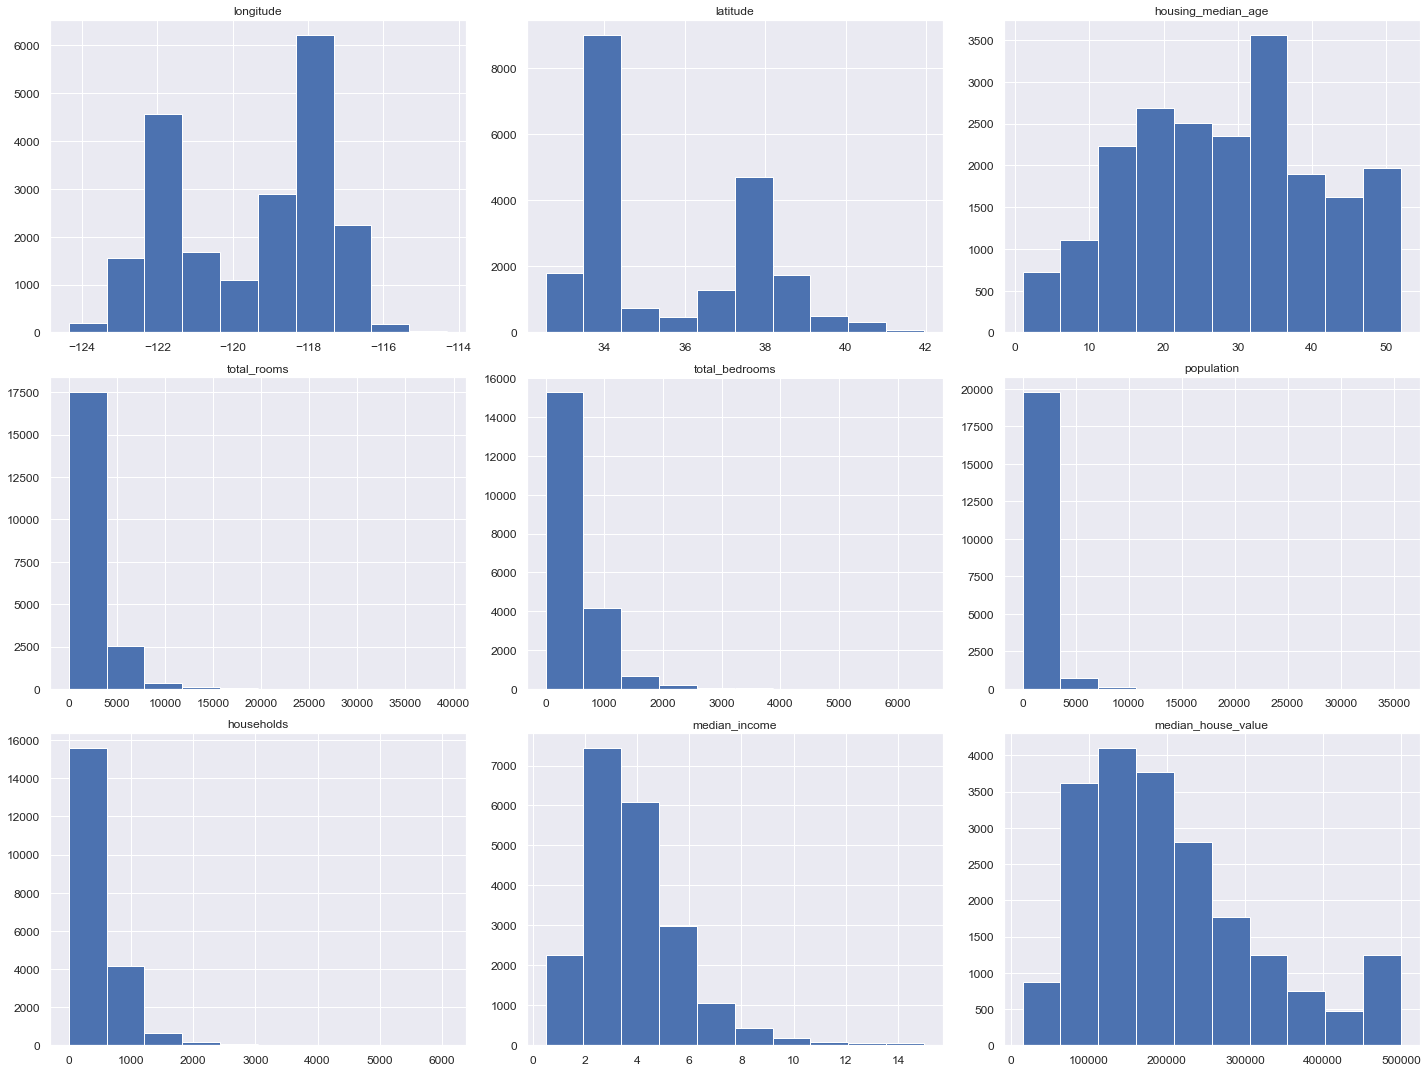

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=10, figsize=(20,15))
save_fig("attribute_histogram_plots")
#plt.show()

Notice a few things in the histograms:

*   First, the median income attribute does not look like it is expressed in US dollars (USD).
That the data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent
roughly tens of thousands of dollars (e.g., 3 actually means about $30,000).
*   The housing median age and the median house value were also capped.
*   These attributes have very different scales.
*   Finally, many histograms are tail heavy: they extend much farther to the right of the
median than to the left.




---
Working with preprocessed attributes is common in Machine Learning, and it is not
necessarily a problem, but you should try to understand how the data was
computed.

---





### Create a Test Set

Creating a test set is theoretically quite simple: just pick some instances randomly,
typically 20% of the dataset (or less if your dataset is very large), and set them:

In [193]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

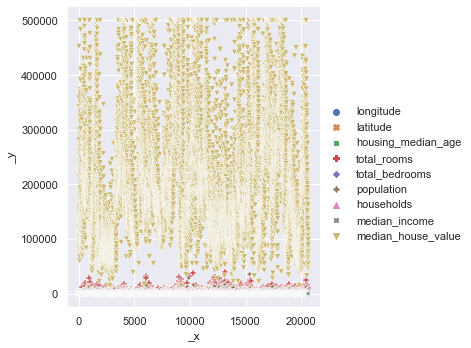

In [194]:

#Cell to check data value randomness

import seaborn as sns

# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=housing#["housing_median_age"],
)

This is a purely **random sampling method**. This is generally fine if your dataset is
large enough (especially relative to the number of attributes), but if it is not, you run
the risk of introducing a significant **sampling bias**.

E.g., the median income is a very important attribute to predict median housing
prices.

*   You may want to ensure that the test set is representative of the various categories of
incomes in the whole dataset.
*   Since the median income is a continuous numerical attribute, you first need to create an
income category attribute.
*   Let’s look at the median income histogram more closely: most median income values
are clustered around 1.5 to 6 (i.e., 15, 000-60,000), but some median incomes go far
beyond 6.
*   It is important to have a suficient number of instances in your dataset for each stratum,
or else the estimate of the stratum’s importance may be biased.


3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64
0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


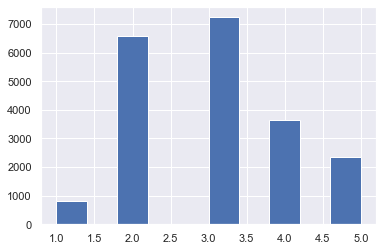

In [195]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
print(housing["income_cat"].value_counts())
housing["income_cat"].hist()

print(housing["income_cat"])


Now you are ready to do stratified sampling based on the income category. For this
you can use Scikit-Learn’s `Strati1edShuffeSplit` class:

In [196]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

Looking at the income category proportions in the test set:

In [197]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

With similar code you can measure the income category proportions in the full
dataset.

In [198]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

To compare the income category proportions in the overall dataset, in the test set
generated with stratified sampling, and in a test set generated using purely random
sampling:

In [199]:
def income_cat_proportions(data):
  return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
  "Overall": income_cat_proportions(housing),
  "Stratified": income_cat_proportions(strat_test_set),
  "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
print(compare_props)

    Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039971  0.040213      0.973236       0.364964
2  0.318847    0.318798  0.324370      1.732260      -0.015195
3  0.350581    0.350533  0.358527      2.266446      -0.013820
4  0.176308    0.176357  0.167393     -5.056334       0.027480
5  0.114438    0.114341  0.109496     -4.318374      -0.084674


As you can see, the test set generated using stratified sampling has income category
proportions almost identical to those in the full dataset, whereas the test set
generated using purely random sampling is quite skewed.

Now you should remove the income_cat attribute so the data is back to its original
state:

In [200]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

## Discover and visualize the data to gain insights

### Visualizing Geographical Data


Create a copy so you can play with it without harming the training set:

In [201]:
housing = strat_train_set.copy()

Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Saving figure visualization_plot


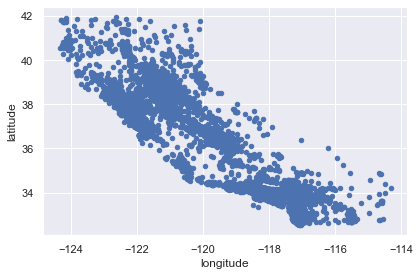

In [202]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("visualization_plot")

This looks like California all right, but other than that it is hard to see any particular
pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Saving figure better_visualization_plot


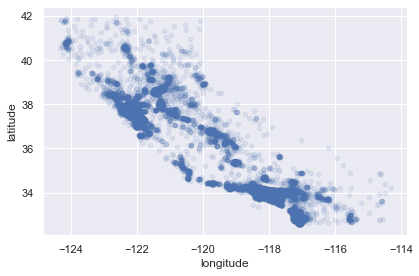

In [203]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Now let’s look at the **housing prices**. We will use a predefined color map (option
cmap) called jet, which ranges from blue (low values) to red (high prices):

Saving figure housing_prices_scatterplot


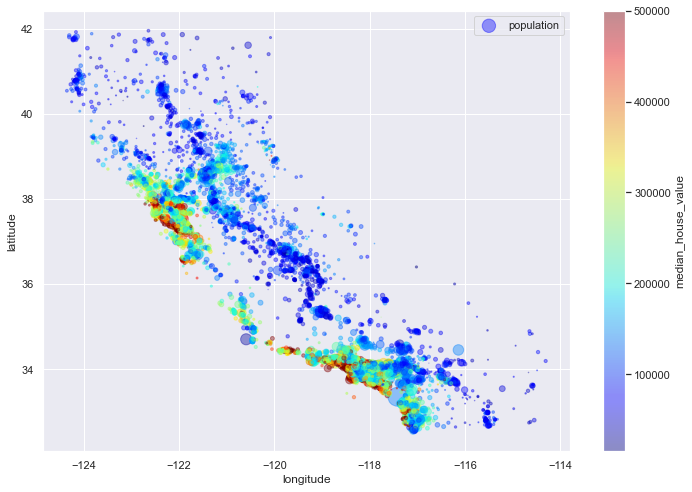

In [204]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

*   The radius of each circle represents the **district’s population** (option s),
*   and the color represents the **price** (option c).



### Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method:

In [205]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute.

Saving figure scatter_matrix_plot


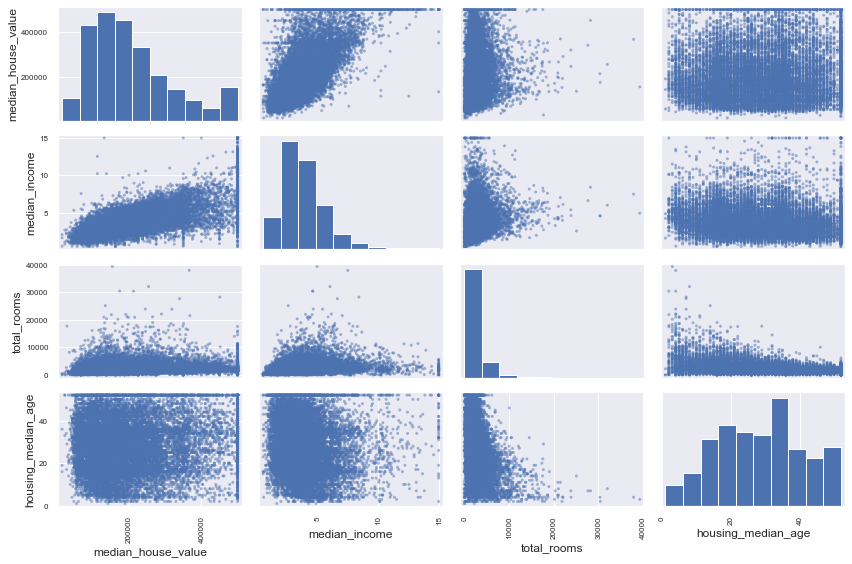

In [206]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Saving figure income_vs_house_value_scatterplot


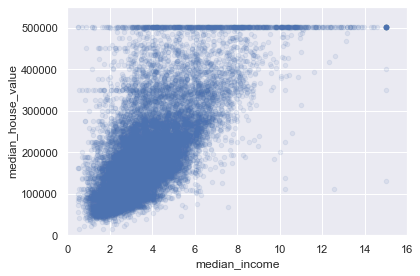

In [207]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

This plot reveals a few things.

* First, the correlation is indeed very strong; you can clearly see the upward trend and the
points are not too dispersed.

* Second, the price cap that we noticed earlier is clearly visible as a horizontal line at
$500,000.

* But this plot reveals other less obvious straight lines: a horizontal line around \$450,000; another around \$350,000: perhaps one around \$280,000, and a few more below that.

* You may want to try removing the corresponding districts to prevent your algorithms

### Experimenting with Attribute Combinations

In [208]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [209]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare the data for Machine Learning algorithms

In [210]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

### Data cleaning

Most Machine Learning algorithms cannot work with **missing features**. E.g., *total_bedrooms* attribute has some missing values. You have three options:

1.   Get rid of the corresponding districts.
2.   Get rid of the whole attribute.
3.   Set the values to some value (zero, the mean, the median, etc.)

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [211]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]#.head()
sample_incomplete_rows

#housing[housing.isnull()]
housing.isnull().any(axis=1)

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Length: 16512, dtype: bool

Get rid of the corresponding districts:

In [212]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


Get rid of the whole attribute:

In [213]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.0546,NEAR OCEAN


Set the values to some value (zero, the mean, the median, etc.):

In [214]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

C:\Users\inda_work\AppData\Local\Temp\ipykernel_10200\760120979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3


Scikit-Learn provides a handy class to take care of missing values: **SimpleImputer**.

* First, you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [215]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

* Since the median can only be computed on numerical attributes, we need to create a
copy of the data without the text attribute *ocean_proximity*:

In [216]:
housing_num = housing.drop("ocean_proximity", axis=1)

* Now you can fit the *imputer* instance to the training data using the *fit(*) method:

In [217]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

* The imputer has simply computed the median of each attribute and stored the result in
its `statistics_` instance variable.

In [218]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

* Check that this is the same as manually computing the median of each attribute:

In [219]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

* Now you can use this "trained" imputer to transform the training set by replacing
missing values by the learned medians:

In [220]:
X = imputer.transform(housing_num)

* The result is a plain NumPy array containing the transformed features. If you want to
put it back into a Pandas DataFrame:

In [221]:
housing_tr = pd.DataFrame(sample_incomplete_rows, columns=housing_num.columns, index=housing.index)

In [222]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546


### About Scikit-Learn Design



Scikit-Learn’s API is remarkably well designed following **5 principles** [1]:

1.   **Consistency**. All objects share a consistent and simple interface.
    *   **Estimators**. Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an *imputer* is an estimator).
        * The estimation itself is performed by the `fit()` method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels).
        * Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).
    *   **Transformers**. Some estimators (such as an *imputer*) can also transform a dataset; these are called transformers.
        * Once again, the API is quite simple: the transformation is performed by the `transform()` method with the dataset to transform as a parameter.
        * It returns the transformed dataset.
        * This transformation generally relies on the learned parameters, as is the case for an *imputer*.
        * All transformers also have a convenience method called `fit_transform()` that is equivalent to calling `fit()` and then `transform()` (but sometimes `fit_transform()` is optimized and runs much faster). 
    *   **Predictors**. Finally, some estimators are capable of making predictions given a dataset; they are called predictors.
        * E.g., the `LinearRegression` model in the previous chapter was a predictor: it predicted life satisfaction given a country’s GDP per capita.
        * A predictor has a `predict()` method that takes a dataset of new instances and returns a dataset of corresponding predictions.
        * It also has a `score()` method that measures the quality of the predictions given a test set (and the corresponding labels in the case of supervised learning algorithms).

2.   **Inspection**. All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., `imputer.strategy`), and all the estimator’s learned parameters are also accessible via public instance variables with an underscore suffix (e.g., `imputer.statistics_`).

3.   **Nonproliferation of classes**. Datasets are represented as *NumPy* arrays or *SciPy* sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

4.   **Composition**. Existing building blocks are reused as much as possible.
    *   E.g., it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator.

5.   **Sensible defaults**. Scikit-Learn provides reasonable default values for most parameters, making it easy to create a baseline working system quickly.

[1] API design for machine learning software: experiences from the scikit-learn project. L. Buitinck, G. Louppe, M. Blondel, F. Pedregosa, A. Müller, et al. (2013).

### Handling Text and Categorical Attributes

Earlier we left out the categorical attribute `ocean_proximity`:

In [223]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


Most Machine Learning algorithms prefer to work with numbers anyway, so let’s
convert these categories from text to numbers:

In [224]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

You can get the list of categories using the `categories_` instance variable:

In [225]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values.
* This may be 1ne in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).
* To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), and so on. This is called `one-hot encoding`.
* Scikit-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors.

In [226]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. You can use it mostly like a normal 2D array, but if you really want to convert it to a (dense) NumPy array, just call the `toarray()` method:

In [227]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [228]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

You can get the list of categories using the encoder’s `categories_` instance variable:

In [229]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---
If a categorical attribute has a **large number of possible categories** (e.g., country code, profession, species, etc.)

* then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance.
* If this happens, you may want to replace the categorical input with useful numerical features related to the categories: e.g., you could replace the `ocean_proximity` feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita).
* Alternatively, you could replace each category with a learnable low dimensional vector called an `embedding`. Each category’s representation would be learned during training: this is an example of representation learning.
---

### Custom transformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes.
* All you need is to create a class and implement three methods: `fit()` (returning self), `transform()`, and `fit_transform()`.
* You can get the last one for free by simply adding `TransformerMixin` as a base class.
* Also, if you add `BaseEstimator` as a base class (and avoid `*args` and `**kargs` in your constructor) you will get two extra methods (`get_params()` and `set_params()`).

E.g., here is a small transformer class that adds combined attributes:

* In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to `True` by default (it is often helpful to provide sensible defaults).
* This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not.
* More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about.

In [230]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
      self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
      return self # nothing else to do
    def transform(self, X):
      rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
      population_per_household = X[:, population_ix] / X[:, households_ix]
      if self.add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
      else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

* Indices (3, 4, 5, 6) are hard coded for concision and clarity, but it would be much cleaner to get them dynamically, like this:

In [231]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names] # get the column indices

* Also, `housing_extra_attribs` is a *NumPy* array, we’ve lost the column names
(unfortunately, that’s a problem with Scikit-Learn). To recover a DataFrame, you could run this:

In [232]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

housing_extra_attribs.head() 

len(housing.columns)

9

### Feature Scaling

* One of the most important transformations you need to apply to your data is **feature scaling**.

* With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.
  
  * This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.
 
* There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

 1. **Min-max scaling** (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1.
    * We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called `MinMaxScaler` for this. It has a `feature_range` hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

 2. **Standardization** is quite different: firs it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.
    * Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1).
    * However, standardization is much less affected by outliers.
    * E.g., suppose a district had a median income equal to 100 (by mistake).
    * Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected.
    * Scikit-Learn provides a transformer called `StandardScaler` for standardization. 

### Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

* The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a `fit_transform()` method).
* When you call the pipeline’s `fit()` method, it calls `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the `fit()` method.
* The pipeline exposes the same methods as the 1nal estimator. In this example, the last estimator is a StandardScaler, which is a transformer, so the pipeline has a `transform()` method that applies all the transforms to the data in sequence (and of course also a `fit_transform()` method, which is the one we used).

In [233]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [234]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

* So far, we have handled the categorical columns and the numerical columns
separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

In [235]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
  ("num", num_pipeline, num_attribs),
  ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared.shape


(16512, 16)

In [236]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [237]:
housing_prepared.shape

(16512, 16)

## Select a model and train it

### Training and Evaluating on the Training Set

Let’s first train a Linear Regression model:

In [238]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Let’s try it out on a few instances from the training set:

In [239]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


Compare against the actual values:

In [240]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Let’s measure this regression model’s RMSE on the whole training set using
Scikit-Learn’s mean_squared_error function:

* This is an example of a model underfitting the training data.
* When this happens it can mean that the features do not provide enough information to
make good predictions, or that the model is not powerful enough.

In [241]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

Let’s train a `DecisionTreeRegressor`. This is a powerful model, capable of finding
complex nonlinear relationships in the data.

In [242]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
#tree_reg.fit(housing_prepared, housing_labels)

In [243]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

* No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly over1t the data.

* How can you be sure? As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are con1dent about, so you need to use part of the training set for training, and part for model validation.

### Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the `train_test_split`
function to split the training set into a smaller training set and a validation set, then
train your models against the smaller training set and evaluate them against the
validation set.

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature.
* The following code randomly splits the training set into 10 distinct subsets called folds,
then it trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds.
* The result is an array containing the 10 evaluation scores.
* Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather
than a cost function (lower is better), so the scoring function is actually the opposite of
the MSE (i.e., a negative value), which is why the preceding code computes -scores
before calculating the square root.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Let’s look at the results:

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
  
display_scores(tree_rmse_scores)

Let’s compute the same scores for the Linear Regression model:

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

So the Decision Tree model is over1tting so badly that it performs worse than the
Linear Regression model.

Let’s try one last model now: the `RandomForestRegressor`.
* Random Forests work by training many Decision Trees on random subsets of the
features, then averaging out their predictions.
* Building a model on top of many other models is called **Ensemble Learning**, and it is
often a great way to push ML algorithms even further.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
#forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Random Forests look very promising. However, note that the score on the training set is
still much lower than on the validation sets, meaning that the model is still over1tting
the training set.


---
You should save every model you experiment with, so you can come back easily to any model you want.

```
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")
```



---

## Fine-tune the model

### Grid Search

Scikit-Learn’s GridSearchCV fiddle with the hyperparameters. All you need to do is tell
it which hyperparameters you want it to experiment with, and what values to try out,
and it will evaluate all the possible combinations of hyperparameter values, using
cross-validation.

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

KeyboardInterrupt: 

---
**When you have no idea what value a hyperparameter should have,**
a simple approach is to try out consecutive powers of 10 (or a smaller number if you want
a more 1ne-grained search, as shown in this example with the n_estimators hyperparameter).

---

When it is done you can get the best combination of parameters like this:

In [ ]:
grid_search.best_params_

You can also get the best estimator directly:

In [ ]:
grid_search.best_estimator_

And of course the evaluation scores are also available:

In [246]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
pd.DataFrame(grid_search.cv_results_)

NameError: name 'grid_search' is not defined

### Randomized Search

**RandomizedSearchCV** can be used in much the same way as the `GridSearchCV` class,
but instead of trying out all possible combinations, it evaluates a given number of
random combinations by selecting a random value for each hyperparameter at every
iteration.

This approach has two main benefits:

1. If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).

2. You have more control over the computing budget you want to allocate to
hyperparameter search, simply by setting the number of iterations.

### Ensemble Methods

Another way to 1ne-tune your system is to try to combine the models that perform
best.

The group (or “ensemble”) will often perform better than the best individual model
(just like Random Forests perform better than the individual Decision Trees they rely
on), especially if the individual models make very different types of errors.

### Analyze the Best Models and Their Errors

You will often gain good insights on the problem by inspecting the best models. For
example, the `RandomForestRegressor` can indicate the relative importance of each
attribute for making accurate predictions:

In [250]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

Let’s display these importance scores next to their corresponding attribute names:

In [251]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

attributes

NameError: name 'feature_importances' is not defined

### Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs
sufficiently well.

Now is the time to evaluate the 1nal model on the test set.

There is nothing special about this process; just get the predictors and the labels
from your test set, run your *full_pipeline* to transform the data, and evaluate the final
model on the test set:

In [252]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
final_rmse

In some cases, such a point estimate of the generalization error will not be quite
enough to convince you to launch: what if it is just 0.1% better than the model
currently in production?

You might want to have an idea of how precise this estimate is. For this, you can
compute a 95% con1dence interval for the generalization error using
`scipy.stats.t.interval()`:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

## Ejercicios

Using the housing dataset:

In [ ]:
# Etiquetas housing_labels
# housing_prepared



### Ejercicio 1

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [253]:
from sklearn.svm import SVR

In [254]:
from sklearn.svm import SVR
print("dslfjjfs")

l_svmReg = SVR(kernel ="linear", C = 1.0, gamma = "scale" )
l_svmReg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))





dslfjjfs
Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [255]:
from sklearn.metrics import mean_squared_error
housing_predictions = l_svmReg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

111095.06635291968

In [256]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3x4) combinations of hyperparameters
    {"kernel": ["linear"], 'C': [1.0, 30.0,3000., 30000.]},
    
    # then try 6 (2x3) combinations with bootstrap set as False
    {"kernel": ["rbf"], 'C': [1.0, 30.0,3000., 30000.], 'gamma': ["scale", "auto", 4.]},
  ]

l_svmReg = SVR(kernel ="linear" )

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(l_svmReg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs = 12)

#grid_search.fit(housing_prepared, housing_labels)



In [ ]:
print(grid_search.best_estimator_)
print(rmse)

### Ejercicio 2

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [257]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform

#We know nothing about the algorithm parameters so use uniform distribution to sample in a specified range
l_paramDistrib = [
    {"kernel":["linear"], "C": uniform(loc = 1, scale = 300)},
   {"kernel": ["rbf"], "C": uniform(loc = 1, scale = 30000), "gamma":uniform(loc = 1, scale = 10000) }
]

l_svmReg = SVR()

# 1 iteration to avoid too much processing..
randomSearch = RandomizedSearchCV(l_svmReg, l_paramDistrib, n_iter = 1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=16)

randomSearch.fit(housing_prepared, housing_labels)


RandomizedSearchCV(estimator=SVR(), n_iter=1, n_jobs=16,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015C9693B070>,
                                         'kernel': ['linear']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015C969CD400>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015C88AF32E0>,
                                         'kernel': ['rbf']}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [258]:

negative_mse=randomSearch.best_score_
rmse = np.sqrt(-negative_mse)

print(randomSearch.best_estimator_)
print(rmse)

SVR(C=7267.131301365715, gamma=7409.585254128788)
118959.40319931708


In [ ]:
housing_prepared

### Ejercicio 3

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [259]:


"""
The transformer will select the most important attributes
those which Pearson's correlation are greater than a specific threshold

"""

l_corrThresh = 0.5


from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CImportantAttribSelector(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
      return self # nothing else to do
    def transform(self, X):
        l_housingPrepared_df = pd.DataFrame(housing_prepared, columns=attributes, index = housing.index)

        #Add median_house_value column
        l_housingPrepared_df["median_house_value"] = housing_labels

        #Obtain correlation of all attributes with median house value
        l_corrAllWithMedianHouseValue = l_housingPrepared_df.corr()["median_house_value"]
        l_corrFilter_ps = l_corrAllWithMedianHouseValue > l_corrThresh
        l_validAttribs = l_corrFilter_ps[l_corrFilter_ps.values != False]

        #Generate new dataframe only with the most important attributes
        #Assume all one hot columns are going to be dropped
        print("\nValid attribs ", l_validAttribs.index.values, type(l_validAttribs.index.values) )
        print("attr " , type(attributes))
        for i in attributes:
            l_housingPrepared_df.drop(i, axis=1)
            if i not in l_validAttribs.index.values:
                #print("Dropping ", i)
                l_housingPrepared_df = l_housingPrepared_df.drop(i, axis=1)

        return l_housingPrepared_df
        
        
        
#Create most important attribute transformer and select the most important data
l_attribSelector = CImportantAttribSelector()
l_housingImportantAttrib = l_attribSelector.transform(housing_prepared) #pass housing only because api restrictions, data code is hardcoded


#Train the previous model
#randomSearch.fit(l_housingImportantAttrib, housing_labels)

#Show results

negative_mse=randomSearch.best_score_
rmse = np.sqrt(-negative_mse)

print(randomSearch.best_estimator_)
print(rmse)



Valid attribs  ['median_income' 'median_house_value'] <class 'numpy.ndarray'>
attr  <class 'list'>
SVR(C=7267.131301365715, gamma=7409.585254128788)
118959.40319931708


In [456]:
"""
l_corrThresh = 0.5

#print(housing.columns)
    
l_housingPrepared_df = pd.DataFrame(housing_prepared, columns=attributes, index = housing.index)

#Add median_house_value column
l_housingPrepared_df["median_house_value"] = housing_labels

#Obtain correlation of all attributes with median house value
l_corrAllWithMedianHouseValue = l_housingPrepared_df.corr()["median_house_value"]
l_corrFilter_ps = l_corrAllWithMedianHouseValue > l_corrThresh
l_validAttribs = l_corrFilter_ps[l_corrFilter_ps.values != False]

#Generate new dataframe only with the most important attributes
print("\nValid attribs ", l_validAttribs.index.values, type(l_validAttribs.index.values) )
print("attr " , type(attributes))
for i in attributes:
    l_housingPrepared_df.drop(i, axis=1)
    if i not in l_validAttribs.index.values:
        #print("Dropping ", i)
        l_housingPrepared_df = l_housingPrepared_df.drop(i, axis=1)

return l_housingPrepared_df
"""
        

ValueError: Shape of passed values is (16512, 16), indices imply (16512, 4)

### Ejercicio 4

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [ ]:

from sklearn.pipeline import Pipeline


#Define class for prediction
class CPrediction():
    def __init__(self):
        pass
    def fit(self, X, y =None):
        #Fit SVM parameters to data (using previous declared randomSearch object, not a good design but
        # valid for show purposes) 
        randomSearch.fit(X, housing_labels)

        #Show and return results
        negative_mse=randomSearch.best_score_
        rmse = np.sqrt(-negative_mse)
        
        return (randomSearch.best_estimator_, rmse)

    
num_pipeline = Pipeline([
  ('attribSelector', CImportantAttribSelector()),
  ('prediction', CPrediction())
])

housing_num_tr = num_pipeline.fit(housing_num)



Valid attribs  ['median_income' 'median_house_value'] <class 'numpy.ndarray'>
attr  <class 'list'>


In [ ]:
print()

### Ejercicio 5

Question: Automatically explore some preparation options using `GridSearchCV`.